In [101]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#read txt file 
data = pd.read_csv("car.txt", delimiter=',')

In [103]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [104]:
#add colunms names for data
data.loc[len(data.index)] = ['vhigh', 'vhigh','2','2','small','low','unacc'] 

In [105]:
# rename the columns names
data.rename(columns = {'vhigh':'buying'}, inplace = True)
data.rename(columns = {'vhigh.1':'maint'}, inplace = True)
data.rename(columns = {'2':'doors'}, inplace = True)
data.rename(columns = {'2.1':'persons'}, inplace = True)
data.rename(columns = {'small':'lug_boot'}, inplace = True)
data.rename(columns = {'low':'safety'}, inplace = True)
data.rename(columns = {'unacc':'class'}, inplace = True)

In [106]:
# columns names
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [107]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [108]:
#The sum of missing values
data.isna().sum()
#Missing Attribute Values: none

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [109]:
#unique value for each columns
print(data["buying"].unique())
print(data["maint"].unique())
print(data["doors"].unique())
print(data["persons"].unique())
print(data["lug_boot"].unique())
print(data["safety"].unique())
print(data["class"].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


In [110]:
#show statistical data
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,med,unacc
freq,432,432,432,576,576,576,1210


In [129]:
#count duplicated
data.duplicated().sum() 

0

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


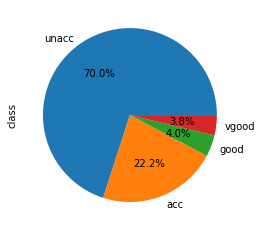

In [130]:
print(data["class"].value_counts())
data["class"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# EDA

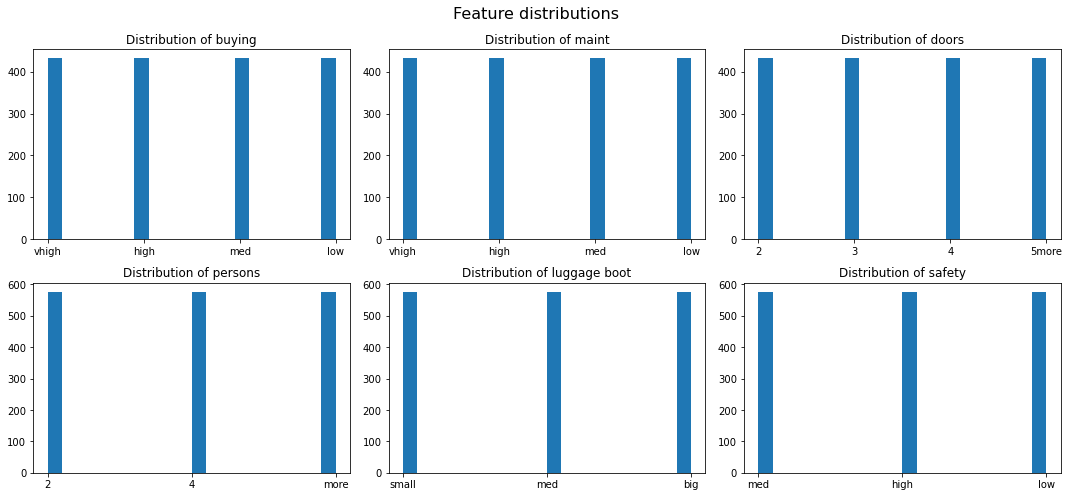

In [42]:
fig,axs = plt.subplots(2,3,figsize=(15,7),tight_layout=True)
axs[0][0].set_title("Distribution of buying")
axs[0][0].hist(data['buying'],bins=20)

axs[0][1].set_title("Distribution of maint")
axs[0][1].hist(data['maint'],bins=20)

axs[0][2].set_title("Distribution of doors")
axs[0][2].hist(data['doors'],bins=20)

axs[1][0].set_title("Distribution of persons")
axs[1][0].hist(data['persons'],bins=20)

axs[1][1].set_title("Distribution of luggage boot")
axs[1][1].hist(data['lug_boot'],bins=20)

axs[1][2].set_title("Distribution of safety")
axs[1][2].hist(data['safety'],bins=20)

fig.suptitle("Feature distributions", fontsize=16)
plt.show()

In [43]:
# all features are balance

In [44]:
def relationship(data,colunm_name,target):
    plt.figure(figsize=(8,5))
    plt.title('The relationship between ' + colunm_name +' and class')
    
    """returns the number of elements is the number of rows * the number
       of columns in gorup by between  feature and target 
    """
    print(data.groupby([colunm_name, target]).size().sort_values(ascending=False))
    d=data.groupby([colunm_name, target]).size().sort_values(ascending=False)
    d.plot.bar()
    plt.show() 

buying  class
vhigh   unacc    360
high    unacc    324
med     unacc    268
low     unacc    258
med     acc      115
high    acc      108
low     acc       89
vhigh   acc       72
low     good      46
        vgood     39
med     vgood     26
        good      23
dtype: int64


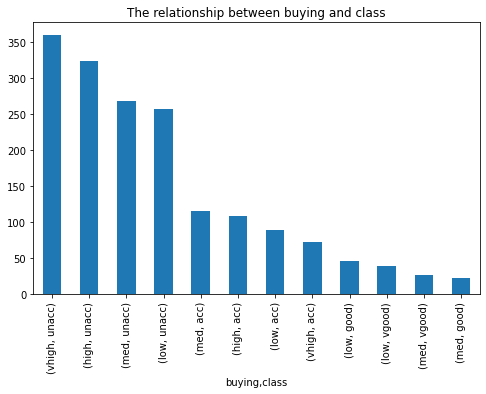

In [45]:
relationship(data,'buying','class')

maint  class
vhigh  unacc    360
high   unacc    314
low    unacc    268
med    unacc    268
       acc      115
high   acc      105
low    acc       92
vhigh  acc       72
low    good      46
       vgood     26
med    vgood     26
       good      23
high   vgood     13
dtype: int64


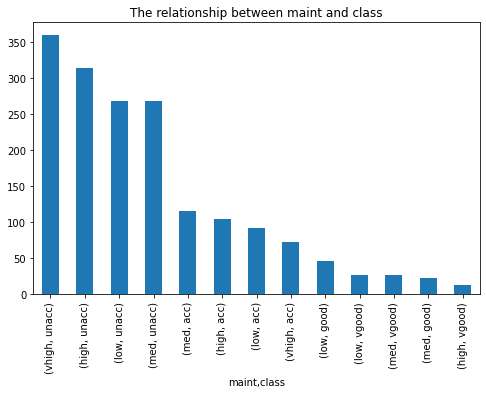

In [46]:
relationship(data,'maint','class')

doors  class
2      unacc    326
3      unacc    300
4      unacc    292
5more  unacc    292
4      acc      102
5more  acc      102
3      acc       99
2      acc       81
4      vgood     20
5more  vgood     20
3      good      18
4      good      18
5more  good      18
2      good      15
3      vgood     15
2      vgood     10
dtype: int64


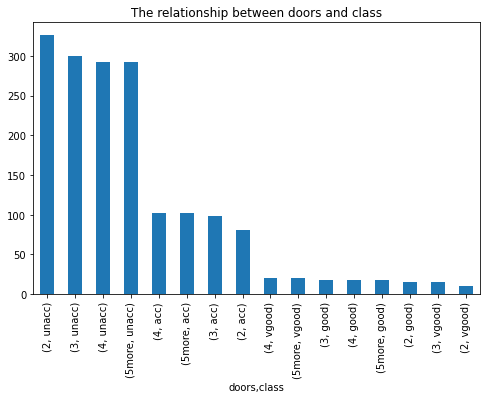

In [47]:
relationship(data,'doors','class')

lug_boot  class
small     unacc    450
med       unacc    392
big       unacc    368
          acc      144
med       acc      135
small     acc      105
big       vgood     40
med       vgood     25
big       good      24
med       good      24
small     good      21
dtype: int64


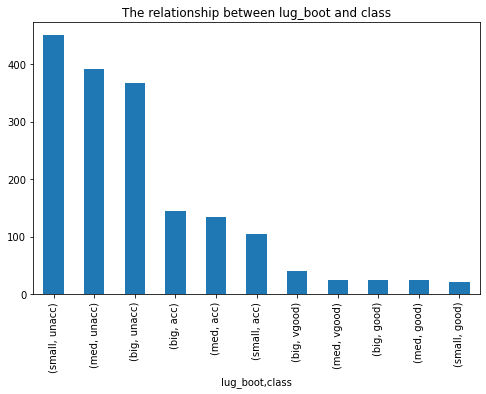

In [48]:
relationship(data,'lug_boot','class')

safety  class
low     unacc    576
med     unacc    357
high    unacc    277
        acc      204
med     acc      180
high    vgood     65
med     good      39
high    good      30
dtype: int64


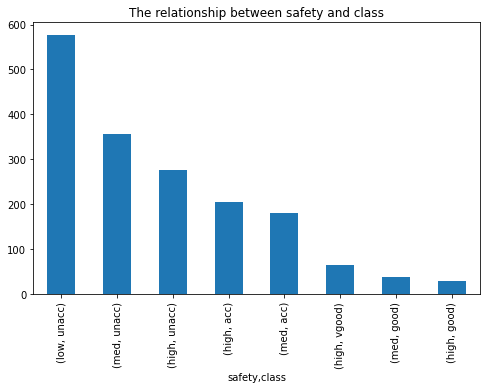

In [49]:
relationship(data,'safety','class')

doors  class
2      unacc    326
3      unacc    300
4      unacc    292
5more  unacc    292
4      acc      102
5more  acc      102
3      acc       99
2      acc       81
4      vgood     20
5more  vgood     20
3      good      18
4      good      18
5more  good      18
2      good      15
3      vgood     15
2      vgood     10
dtype: int64


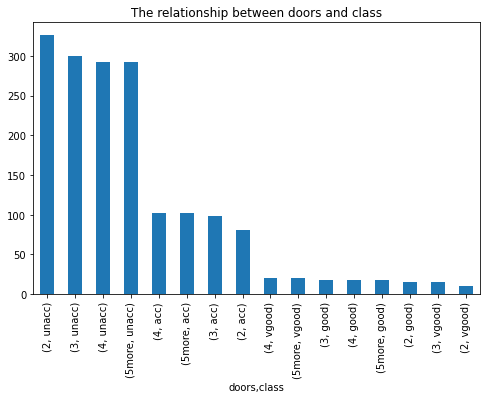

In [50]:
relationship(data,'doors','class')

In [ ]:
def twoway_table_relative(data,colunm_name,target):
    twowaytable=pd.crosstab(data[target],data[colunm_name],margins=True)
    
    """
    builds a cross-tabulation table that can show the 
    frequency with which certain groups of data appear.
    """
    print(twowaytable)
    relative_table = round(twowaytable/twowaytable.loc["All"], 2)
    
    """
    a relative frequency table that tells frequencies instead of counts.
    """
    print("___"*13)
    print(relative_table.drop(['All'], axis=0))
    relative_table.drop(['All'], axis=0).plot.bar()
    plt.show()

In [195]:
def twoway_table_relative(data,colunm_name,target):
    twowaytable=pd.crosstab(data[target],data[colunm_name],margins=True)
    
    """
    builds a cross-tabulation table that can show the 
    frequency with which certain groups of data appear.
    """
    print(twowaytable)
    relative_table = round(twowaytable/twowaytable.loc["All"], 2)
    
    """
    a relative frequency table that tells frequencies instead of counts.
    """
    print("___"*13)
    print(relative_table.drop(['All'], axis=0))
    relative_table.drop(['All'], axis=0).plot.bar()
    plt.show()
    relative_table=relative_table.drop(['All'], axis=0)
    relative_table['All'].plot.pie(autopct='%1.1f%%')
    plt.show()

buying  high  low  med  vhigh   All
class                              
acc      108   89  115     72   384
good       0   46   23      0    69
unacc    324  258  268    360  1210
vgood      0   39   26      0    65
All      432  432  432    432  1728
_______________________________________
buying  high   low   med  vhigh   All
class                                
acc     0.25  0.21  0.27   0.17  0.22
good    0.00  0.11  0.05   0.00  0.04
unacc   0.75  0.60  0.62   0.83  0.70
vgood   0.00  0.09  0.06   0.00  0.04


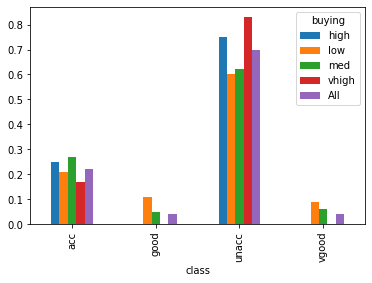

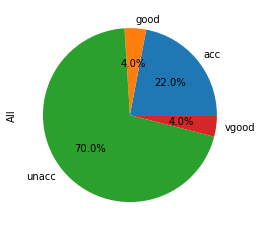

In [196]:
twoway_table_relative(data,'buying','class')

maint  high  low  med  vhigh   All
class                             
acc     105   92  115     72   384
good      0   46   23      0    69
unacc   314  268  268    360  1210
vgood    13   26   26      0    65
All     432  432  432    432  1728
_______________________________________
maint  high   low   med  vhigh   All
class                               
acc    0.24  0.21  0.27   0.17  0.22
good   0.00  0.11  0.05   0.00  0.04
unacc  0.73  0.62  0.62   0.83  0.70
vgood  0.03  0.06  0.06   0.00  0.04


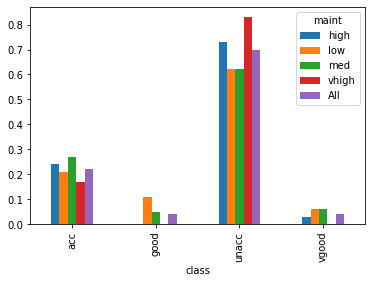

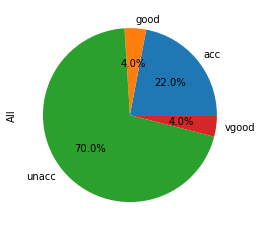

In [197]:
twoway_table_relative(data,'maint','class')

lug_boot  big  med  small   All
class                          
acc       144  135    105   384
good       24   24     21    69
unacc     368  392    450  1210
vgood      40   25      0    65
All       576  576    576  1728
_______________________________________
lug_boot   big   med  small   All
class                            
acc       0.25  0.23   0.18  0.22
good      0.04  0.04   0.04  0.04
unacc     0.64  0.68   0.78  0.70
vgood     0.07  0.04   0.00  0.04


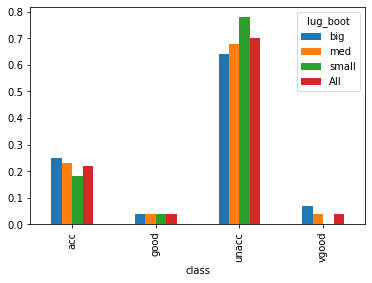

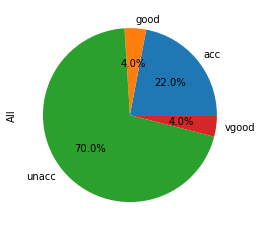

In [198]:
twoway_table_relative(data,'lug_boot','class')

In [ ]:
70% of luggage boot are unacceptable 
4% of luggage boot are very good 
4% of luggage boot are good 
22% of luggage bootprice are acceptable 

safety  high  low  med   All
class                       
acc      204    0  180   384
good      30    0   39    69
unacc    277  576  357  1210
vgood     65    0    0    65
All      576  576  576  1728
_______________________________________
safety  high  low   med   All
class                        
acc     0.35  0.0  0.31  0.22
good    0.05  0.0  0.07  0.04
unacc   0.48  1.0  0.62  0.70
vgood   0.11  0.0  0.00  0.04


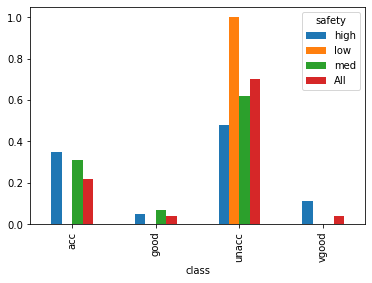

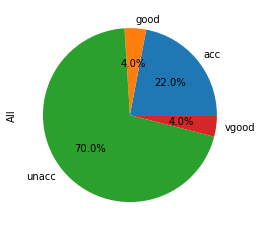

In [199]:
twoway_table_relative(data,'safety','class')

doors    2    3    4  5more   All
class                            
acc     81   99  102    102   384
good    15   18   18     18    69
unacc  326  300  292    292  1210
vgood   10   15   20     20    65
All    432  432  432    432  1728
_______________________________________
doors     2     3     4  5more   All
class                               
acc    0.19  0.23  0.24   0.24  0.22
good   0.03  0.04  0.04   0.04  0.04
unacc  0.75  0.69  0.68   0.68  0.70
vgood  0.02  0.03  0.05   0.05  0.04


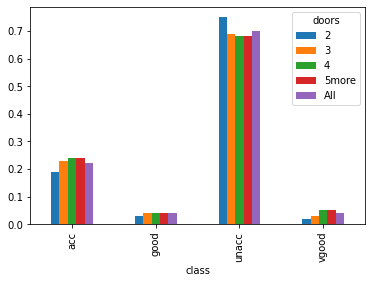

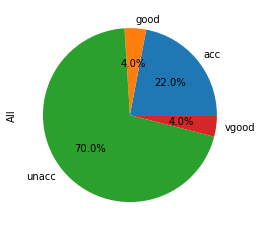

In [200]:
twoway_table_relative(data,'doors','class')

In [ ]:
19% of cars with 2-doors   was acceptable.
3% of cars with 2-doors  boot was  good.
75% of cars with 2-doors e was unacceptable.
2% of cars with 2-doors  boot was very good.
______________________________________________________
23% of cars with 3-doors   was acceptable.
4% of cars with 3-doors  boot was  good.
69% of cars with 3-doors e was unacceptable.
3% of cars with 3-doors  boot was very good.
_______________________________________________________
24% of cars with 4-doors   was acceptable.
4% of cars with 4-doors  boot was  good.
68% of cars with 4-doors e was unacceptable.
5% of cars with 4-doors  boot was very good.
______________________________________________________
22% of carswith 5more-doors  acceptable.
4% of cars with 5more-doors  was good.
70% of cars with 5more-doors  was unacceptable.
4% of cars with 5more-doors  was very good.

In [239]:
new_data_all_acc = data.loc[(data['class'] != 'unacc')]
new_data_all_acc

,buying,maint,doors,persons,lug_boot,safety,class
226,vhigh,med,2,4,small,high,acc
229,vhigh,med,2,4,med,high,acc
231,vhigh,med,2,4,big,med,acc
232,vhigh,med,2,4,big,high,acc
238,vhigh,med,2,more,med,high,acc
...,...,...,...,...,...,...,...
1720,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,med,good


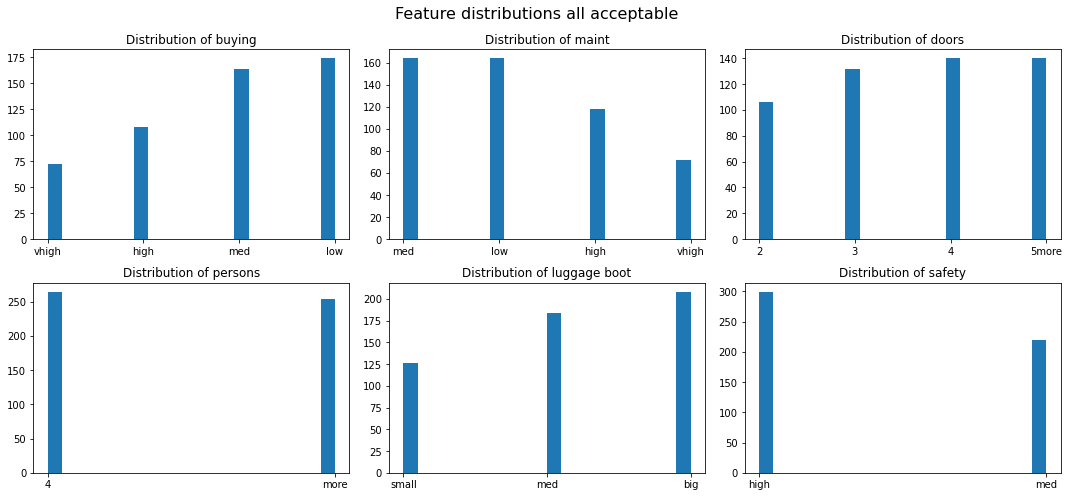

In [247]:
fig,axs = plt.subplots(2,3,figsize=(15,7),tight_layout=True)
axs[0][0].set_title("Distribution of buying")
axs[0][0].hist(new_data_all_acc['buying'],bins=20)

axs[0][1].set_title("Distribution of maint")
axs[0][1].hist(new_data_all_acc['maint'],bins=20)

axs[0][2].set_title("Distribution of doors")
axs[0][2].hist(new_data_all_acc['doors'],bins=20)

axs[1][0].set_title("Distribution of persons")
axs[1][0].hist(new_data_all_acc['persons'],bins=20)

axs[1][1].set_title("Distribution of luggage boot")
axs[1][1].hist(new_data_all_acc['lug_boot'],bins=20)

axs[1][2].set_title("Distribution of safety")
axs[1][2].hist(new_data_all_acc['safety'],bins=20)

fig.suptitle("Feature distributions all acceptable", fontsize=16)
plt.show()

In [ ]:
#the car be acceptable and good and very good when the safety high or med  and person 4 or more 

In [228]:
new_data_good = data.loc[(data['class'] == 'good')]
new_data_good

,buying,maint,doors,persons,lug_boot,safety,class
1198,med,low,2,4,small,high,good
1201,med,low,2,4,med,high,good
1203,med,low,2,4,big,med,good
1210,med,low,2,more,med,high,good
1212,med,low,2,more,big,med,good
...,...,...,...,...,...,...,...
1713,low,low,5more,4,med,med,good
1716,low,low,5more,4,big,med,good
1720,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,med,good


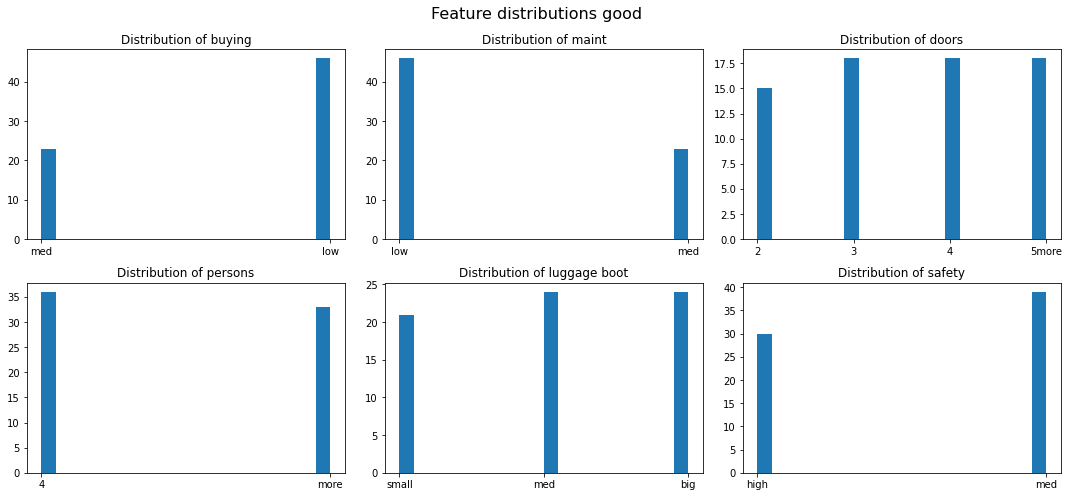

In [248]:
fig,axs = plt.subplots(2,3,figsize=(15,7),tight_layout=True)
axs[0][0].set_title("Distribution of buying")
axs[0][0].hist(new_data_good['buying'],bins=20)

axs[0][1].set_title("Distribution of maint")
axs[0][1].hist(new_data_good['maint'],bins=20)

axs[0][2].set_title("Distribution of doors")
axs[0][2].hist(new_data_good['doors'],bins=20)

axs[1][0].set_title("Distribution of persons")
axs[1][0].hist(new_data_good['persons'],bins=20)

axs[1][1].set_title("Distribution of luggage boot")
axs[1][1].hist(new_data_good['lug_boot'],bins=20)

axs[1][2].set_title("Distribution of safety")
axs[1][2].hist(new_data_good['safety'],bins=20)

fig.suptitle("Feature distributions good", fontsize=16)
plt.show()

In [221]:
#the car be good when buying med or low and maint low or med and persons 4 or more and safety high or med

In [245]:
new_data_vgood = data.loc[(data['class'] == 'vgood')]
new_data_vgood

,buying,maint,doors,persons,lug_boot,safety,class
1096,med,med,2,4,big,high,vgood
1105,med,med,2,more,big,high,vgood
1123,med,med,3,4,big,high,vgood
1129,med,med,3,more,med,high,vgood
1132,med,med,3,more,big,high,vgood
...,...,...,...,...,...,...,...
1699,low,low,4,more,big,high,vgood
1714,low,low,5more,4,med,high,vgood
1717,low,low,5more,4,big,high,vgood
1723,low,low,5more,more,med,high,vgood


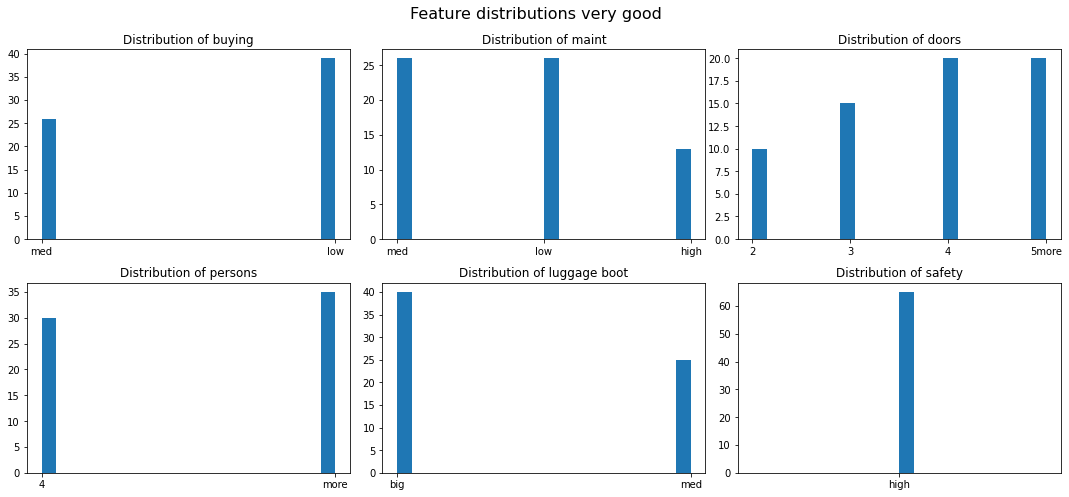

In [249]:
fig,axs = plt.subplots(2,3,figsize=(15,7),tight_layout=True)
axs[0][0].set_title("Distribution of buying")
axs[0][0].hist(new_data_vgood['buying'],bins=20)

axs[0][1].set_title("Distribution of maint")
axs[0][1].hist(new_data_vgood['maint'],bins=20)

axs[0][2].set_title("Distribution of doors")
axs[0][2].hist(new_data_vgood['doors'],bins=20)

axs[1][0].set_title("Distribution of persons")
axs[1][0].hist(new_data_vgood['persons'],bins=20)

axs[1][1].set_title("Distribution of luggage boot")
axs[1][1].hist(new_data_vgood['lug_boot'],bins=20)

axs[1][2].set_title("Distribution of safety")
axs[1][2].hist(new_data_vgood['safety'],bins=20)

fig.suptitle("Feature distributions very good", fontsize=16)
plt.show()

In [ ]:
#the car be very good when buying med or low and persons 4 or more and luggage boot big or med and safety high

In [236]:
new_data_acc = data.loc[(data['class'] == 'acc')]
new_data_acc

,buying,maint,doors,persons,lug_boot,safety,class
226,vhigh,med,2,4,small,high,acc
229,vhigh,med,2,4,med,high,acc
231,vhigh,med,2,4,big,med,acc
232,vhigh,med,2,4,big,high,acc
238,vhigh,med,2,more,med,high,acc
...,...,...,...,...,...,...,...
1665,low,low,3,more,small,med,acc
1683,low,low,4,4,small,med,acc
1692,low,low,4,more,small,med,acc
1710,low,low,5more,4,small,med,acc


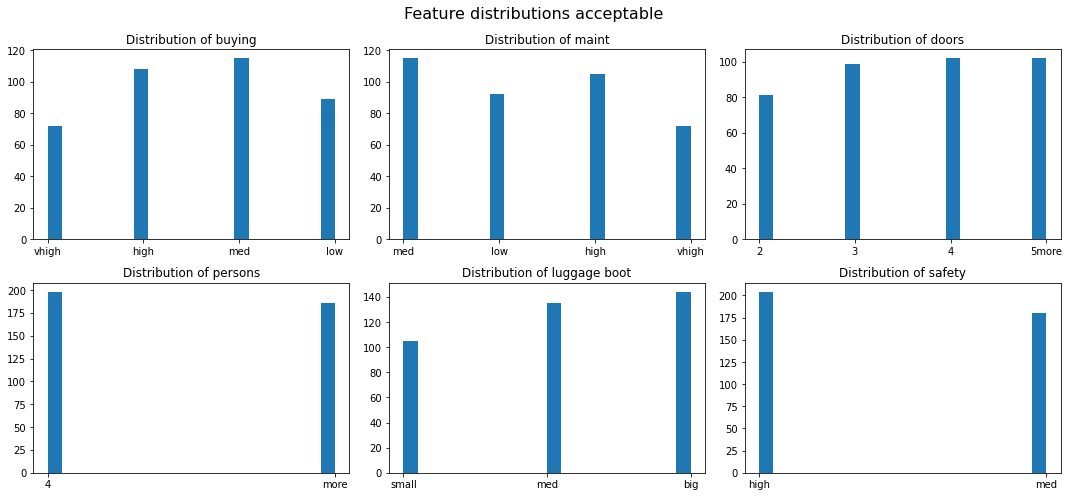

In [250]:
fig,axs = plt.subplots(2,3,figsize=(15,7),tight_layout=True)
axs[0][0].set_title("Distribution of buying")
axs[0][0].hist(new_data_acc['buying'],bins=20)

axs[0][1].set_title("Distribution of maint")
axs[0][1].hist(new_data_acc['maint'],bins=20)

axs[0][2].set_title("Distribution of doors")
axs[0][2].hist(new_data_acc['doors'],bins=20)

axs[1][0].set_title("Distribution of persons")
axs[1][0].hist(new_data_acc['persons'],bins=20)

axs[1][1].set_title("Distribution of luggage boot")
axs[1][1].hist(new_data_acc['lug_boot'],bins=20)

axs[1][2].set_title("Distribution of safety")
axs[1][2].hist(new_data_acc['safety'],bins=20)

fig.suptitle("Feature distributions acceptable ", fontsize=16)
plt.show()

In [238]:
#the car be acceptable when persons 4 or more and safety high or med